##**The Normal Equation**

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

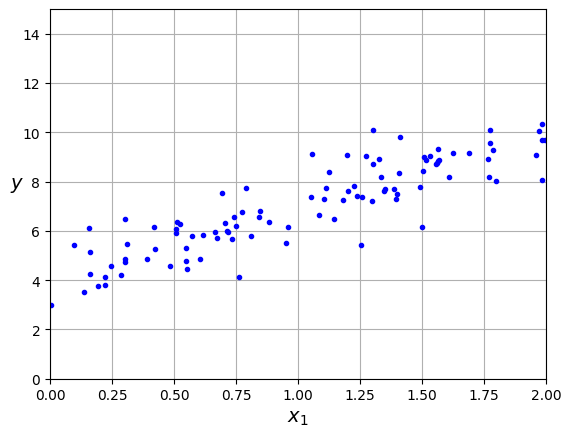

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [4]:
theta_best

array([[4.06558526],
       [2.88332373]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06558526],
       [9.83223273]])

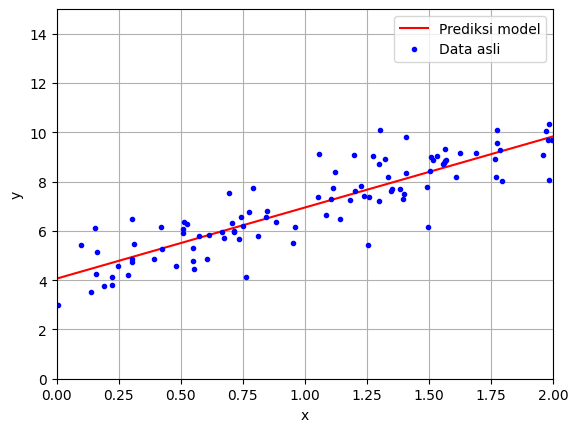

In [6]:
plt.plot(X_new, y_predict, "r-", label="Prediksi model")
plt.plot(X, y, "b.", label="Data asli")
plt.xlabel("x")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.06558526]), array([[2.88332373]]))

In [8]:
lin_reg.predict(X_new)

array([[4.06558526],
       [9.83223273]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06558526],
       [2.88332373]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.06558526],
       [2.88332373]])

##**Gradient Descent**

In [11]:
import numpy as np

# 1. Buat dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Tambahkan x0 = 1 untuk bias (intercept)
X_b = np.c_[np.ones((100, 1)), X]  # tambah kolom 1 di depan

# 3. Inisialisasi hyperparameter dan theta
eta = 0.1  # learning rate
n_iterations = 1000
m = 100  # jumlah sample
theta = np.random.randn(2, 1)  # random init theta (bias dan slope)

# 4. Gradient Descent loop
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# 5. Cetak hasil theta
print("theta hasil training:", theta)

theta hasil training: [[4.21509616]
 [2.77011339]]


In [12]:
theta

array([[4.21509616],
       [2.77011339]])

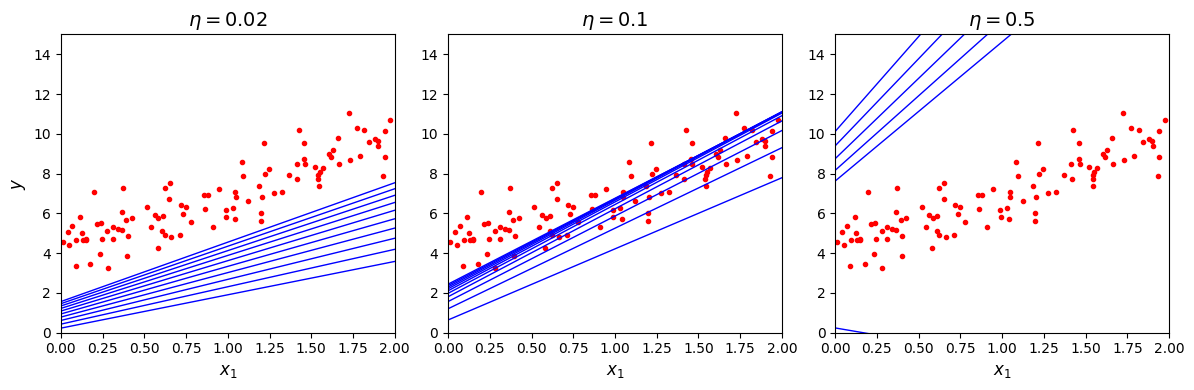

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Buat dataset sintetis
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # tambah bias term
m = len(X_b)

# 2. Fungsi untuk run gradient descent dan simpan theta tiap iterasi
def plot_gradient_descent(eta, theta_path=None):
    theta = np.random.randn(2, 1)  # random init
    for iteration in range(10):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "b-", linewidth=1)

# 3. Siapkan data untuk prediksi
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# 4. Visualisasi untuk berbagai learning rate
etas = [0.02, 0.1, 0.5]
plt.figure(figsize=(12, 4))
for i, eta in enumerate(etas):
    plt.subplot(1, 3, i + 1)
    plt.title(f"$\\eta = {eta}$", fontsize=14)
    plt.plot(X, y, "r.")
    theta_path = []
    plot_gradient_descent(eta, theta_path)
    plt.xlabel("$x_1$", fontsize=12)
    if i == 0:
        plt.ylabel("$y$", fontsize=12)
    plt.axis([0, 2, 0, 15])

plt.tight_layout()
plt.show()

In [15]:
import numpy as np

# 1. Dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Tambahkan x0 = 1 untuk bias
X_b = np.c_[np.ones((100, 1)), X]
m = len(X_b)  # jumlah data

# 3. Hyperparameter
n_epochs = 50
t0, t1 = 5, 50  # untuk learning schedule

# 4. Fungsi learning rate schedule
def learning_schedule(t):
    return t0 / (t + t1)

# 5. Inisialisasi theta secara acak
theta = np.random.randn(2, 1)

# 6. Training dengan Stochastic Gradient Descent
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

# 7. Tampilkan hasil
print("Theta hasil training (SGD):")
print(theta)

Theta hasil training (SGD):
[[4.19000137]
 [2.73381258]]


In [16]:
theta

array([[4.19000137],
       [2.73381258]])

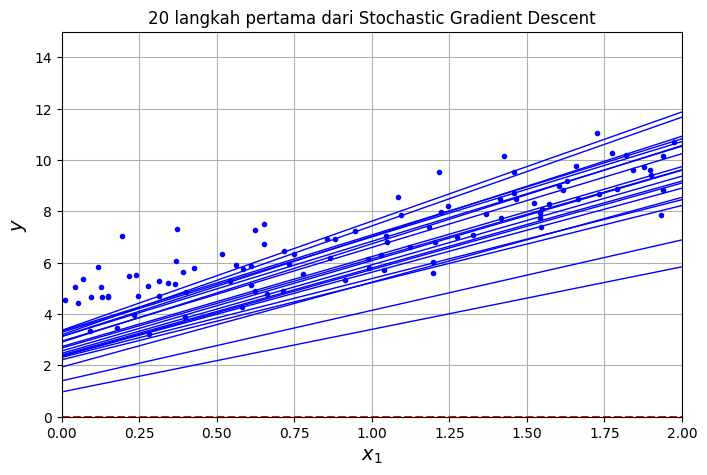

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
m = len(X_b)

plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

for epoch in range(1):
    for i in range(20):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "b-", linewidth=1)

plt.plot([0, 2], [0, 0], "r--")

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("20 langkah pertama dari Stochastic Gradient Descent")
plt.grid(True)
plt.show()

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25422926]), array([2.8263722]))

##**Mini-batch Gradient Descent**

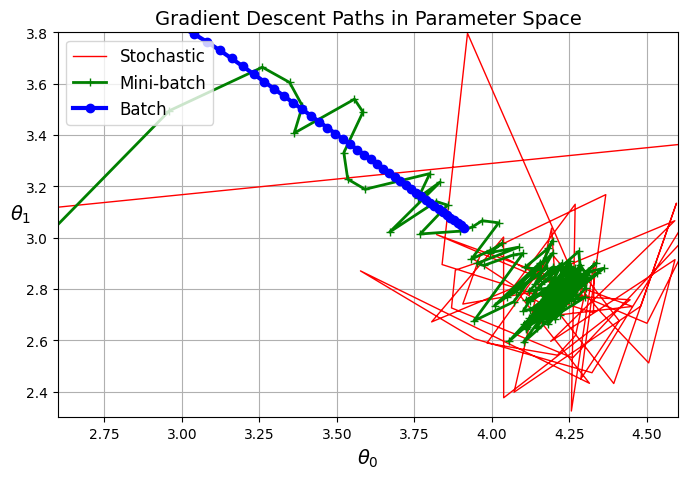

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

# === 1. Dataset ===
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
m = len(X_b)

# === 2. Learning Schedule ===
def learning_schedule(t, t0=200, t1=1000):
    return t0 / (t + t1)

# === 3. Batch Gradient Descent ===
theta_bgd = np.random.randn(2, 1)
theta_path_bgd = [theta_bgd.copy()]
eta = 0.1
for _ in range(50):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta_bgd) - y)
    theta_bgd = theta_bgd - eta * gradients
    theta_path_bgd.append(theta_bgd.copy())

# === 4. Stochastic Gradient Descent ===
theta_sgd = np.random.randn(2, 1)
theta_path_sgd = [theta_sgd.copy()]
for epoch in range(50):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
        # Tambahkan hanya setiap 100 langkah agar tidak penuh
        if (epoch * m + i) % 100 == 0:
            theta_path_sgd.append(theta_sgd.copy())

# === 5. Mini-batch Gradient Descent ===
theta_mgd = np.random.randn(2, 1)
theta_path_mgd = [theta_mgd.copy()]
n_epochs = 50
minibatch_size = 20
n_batches = ceil(m / minibatch_size)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta_mgd) - yi)
        eta = learning_schedule(epoch * n_batches + i // minibatch_size)
        theta_mgd = theta_mgd - eta * gradients
        theta_path_mgd.append(theta_mgd.copy())

# === 6. Konversi ke array ===
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# === 7. Visualisasi ===
plt.figure(figsize=(8, 5))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$", fontsize=14)
plt.ylabel(r"$\theta_1$", fontsize=14, rotation=0)
plt.title("Gradient Descent Paths in Parameter Space", fontsize=14)
plt.axis([2.6, 4.6, 2.3, 3.8])
plt.grid(True)
plt.show()

##**Polynomial Regression**

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [22]:
import os

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", f"{fig_id}.{fig_extension}")
    print(f"Saving figure to {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure to ./quadratic_data_plot.png


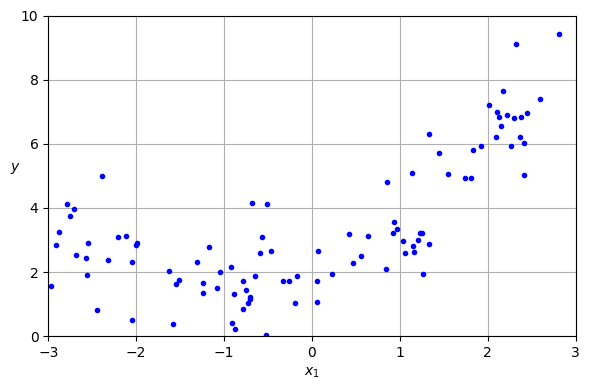

In [24]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.93707422])

In [26]:
X_poly[0]

array([0.93707422, 0.87810809])

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97449026]), array([[0.97553626, 0.50284469]]))

Saving figure to ./quadratic_predictions_plot.png


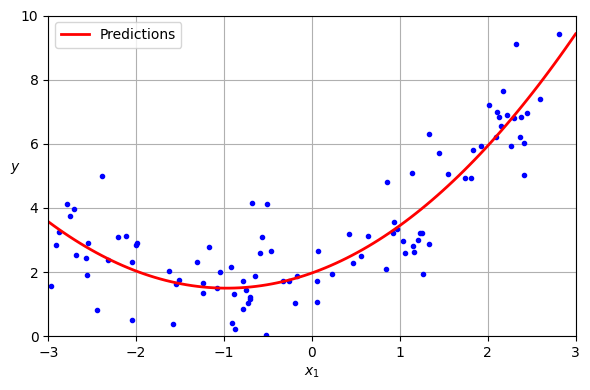

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg.fit(X_poly, y)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)


plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure to ./high_degree_polynomials_plot.png


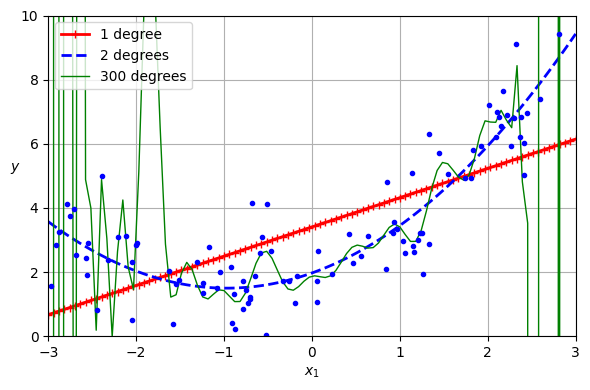

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

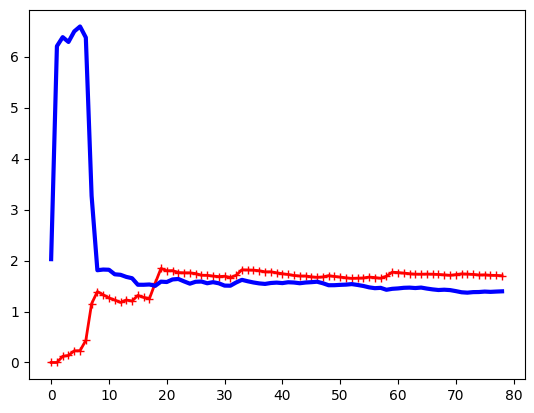

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

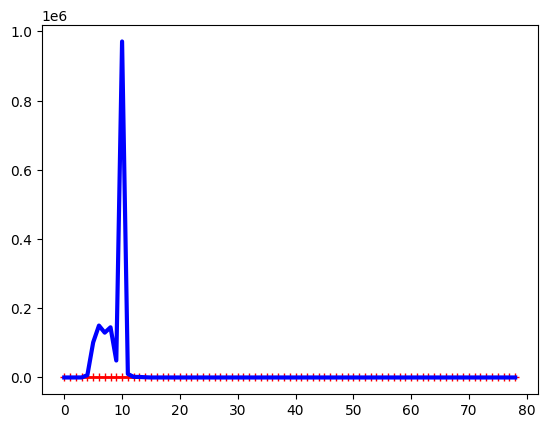

In [32]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

##**Ridge Regression**

In [33]:
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + X**2 + np.random.randn(m, 1)  # kuadrat agar nonlinear
X_new = np.linspace(0, 3, 100).reshape(100, 1)

NameError: name 'Ridge' is not defined

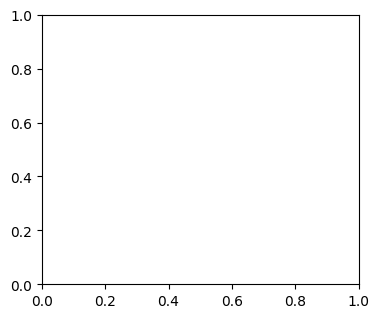

In [37]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3, label="Data")  # data asli
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha=alpha, **model_kwargs)
        else:
            model = LinearRegression()

        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model
            )

        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")

    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([0, 3, 0, 10])
    plt.legend(loc="upper left")
    plt.grid(True)

# 4. Plot Ridge Regression
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.title("Tanpa Polynomial")
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("Dengan Polynomial")
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.77095256])

In [39]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.81718641])

##**Lasso Regression**

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.76326767])

Saving figure to ./lasso_regression_plot.png


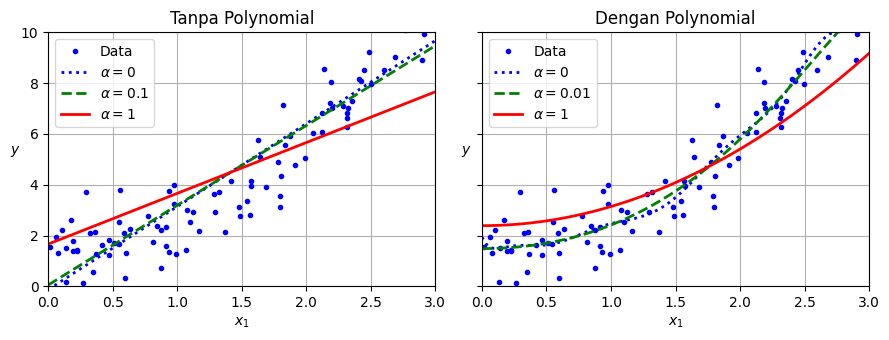

In [41]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3, label="Data")
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha=alpha, **model_kwargs)
        else:
            model = LinearRegression()

        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model
            )

        model.fit(X, y.ravel())  # y.ravel() untuk Lasso compatibility
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")

    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([0, 3, 0, 10])
    plt.legend(loc="upper left")
    plt.grid(True)

# 4. Plot Lasso Regression
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.title("Tanpa Polynomial")

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.title("Dengan Polynomial")
plt.gca().axes.yaxis.set_ticklabels([])

save_fig("lasso_regression_plot")
plt.show()

Saving figure to ./lasso_vs_ridge_plot.png


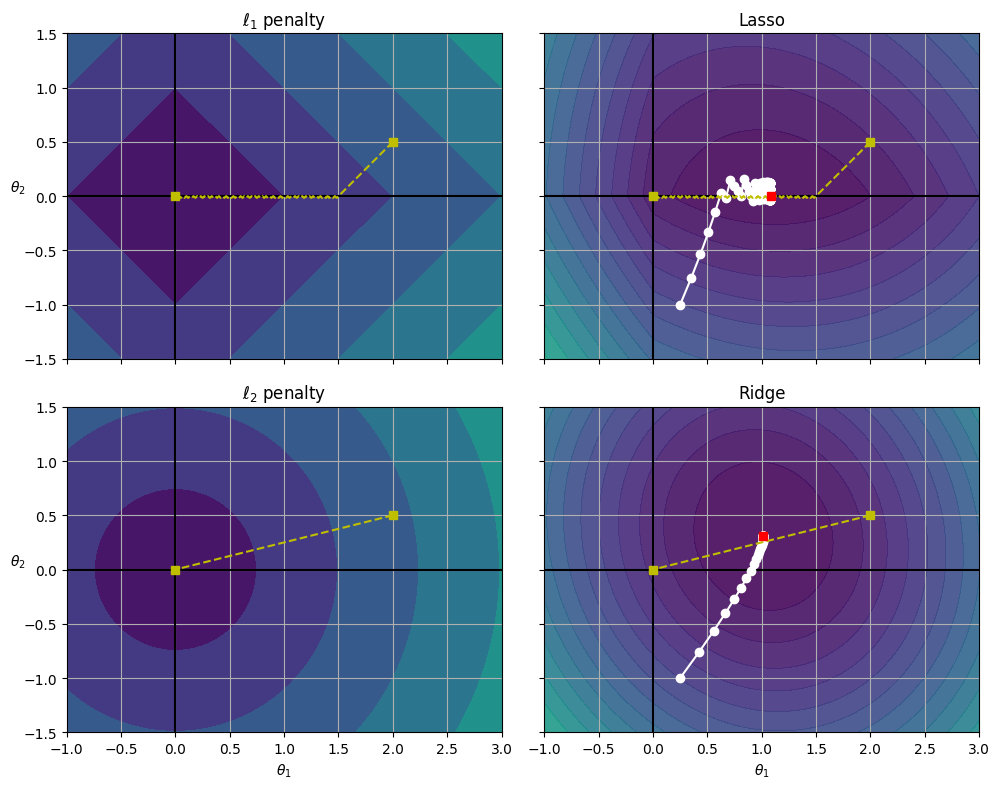

In [42]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

##**Elastic Net**

In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.75185161])

##**Early Stopping**

In [44]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

Saving figure to ./early_stopping_plot.png


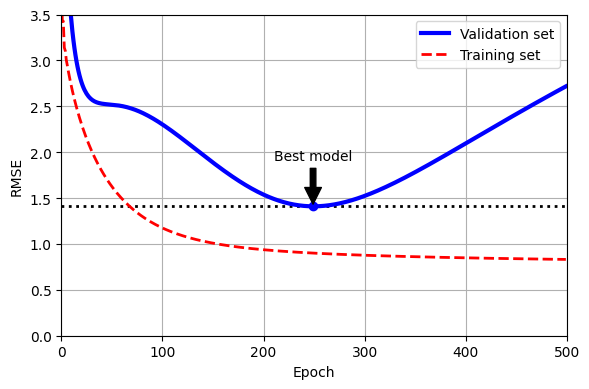

In [45]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

In [46]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=None,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
    random_state=42
)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print(f"Best model did occur at epoch {best_epoch} with validation MSE = {minimum_val_error:.5f}")

NameError: name 'X_val' is not defined

##**Logistic Regression**

**Estimating Probabilities**

Saving figure to ./logistic_function_plot.png


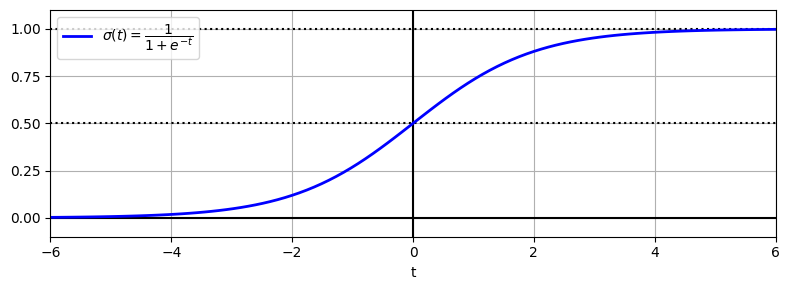

In [47]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

##**Decision Boundaries**

In [48]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int64)
print("Fitur X (petal width):\n", X[:5])
print("Target y (virginica?):\n", y[:5])

Fitur X (petal width):
 [[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]
Target y (virginica?):
 [0 0 0 0 0]


In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Saving figure to ./logistic_regression_plot.png


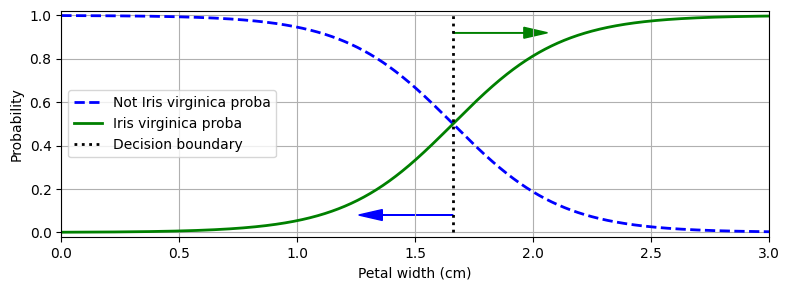

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [51]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [52]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = iris_df[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs", label="Bukan Virginica")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^", label="Virginica")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.legend()
plt.title("Logistic Regression: Decision Boundary & Probability Contour")
plt.show()

NameError: name 'load_iris' is not defined

##**Softmax Regression**

In [53]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [54]:
softmax_reg.predict([[5, 2]])

array([2])

In [55]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])

Saving figure to ./softmax_regression_contour_plot.png


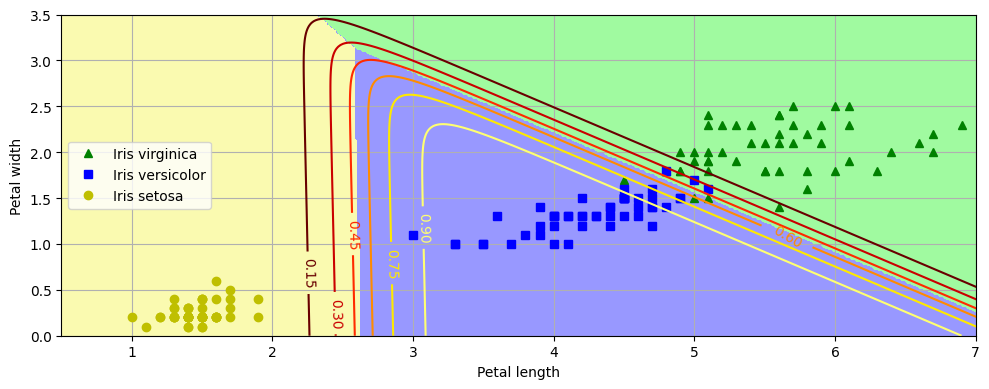

In [56]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

##**Exercise Solutions**

1. Which Linear Regression training algorithm can you use if you have a training set with millions of features?

* Metode seperti Normal Equation atau Batch Gradient Descent akan terlalu lambat dan membutuhkan terlalu banyak memori untuk dataset yang sangat besar (terutama dengan jutaan fitur).

* SGD jauh lebih hemat memori dan cocok untuk data besar karena bekerja dengan satu contoh atau sekelompok kecil contoh data pada satu waktu.

2. Suppose the features in your training set have very different scales. Which algo‐ rithms might suffer from this, and how? What can you do about it?

masalahnya adalah

* Gradient Descent bisa membutuhkan waktu lama untuk konvergen.
* Model bisa memberikan bobot besar pada fitur yang skala nilainya besar

solusi Lakukan feature scaling menggunakan:

* Standardization (Z-score): StandardScaler()
* Normalization (Min-Max scaling): MinMaxScaler()

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

* Logistic Regression memiliki fungsi loss convex (cembung).
* Gradient Descent hanya akan menuju global minimum, bukan local minimum.
* Namun bisa saja konvergen perlahan atau berosilasi jika learning rate tidak optimal.

4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?

> Learning rate cukup kecil dan menurun secara tepat (khususnya untuk SGD/Mini-batch).Tidak ada regularisasi stochastik atau gangguan lain. Tapi SGD bersifat stokastik, jadi hasil akhirnya bisa sedikit berbeda antar run (kecuali kamu set random_state) dan semua menuju ke area global minimum, tapi bisa sedikit berbeda nilainya.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

masalahnya adalah: Model overfitting: terlalu cocok pada data training tapi buruk pada data validasi dan atau learning rate terlalu besar, membuat model "melompat-lompat".

solusinya:

* Gunakan early stopping: berhenti training saat validation error naik terus.
* Tambahkan regularization (seperti L2 / Ridge).
* kurangi learning rate.

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the vali‐ dation error goes up?

> Karena Mini-batch GD bersifat stochastic, error bisa naik sementara karena fluktuasi acak. Maka lebih baik gunakan early stopping dengan patience, yaitu tunggu beberapa epoch untuk melihat tren. Dan gunakan moving average atau validation smoothing untuk menghindari reaksi berlebihan pada satu kenaikan.

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

* Yang tercepat ke sekitar solusi optimal: Stochastic Gradient Descent (SGD) karena setiap langkahnya cepat (hanya 1 data point per update).

* Yang paling mungkin benar-benar konvergen: Batch Gradient Descent, karena mengikuti gradien rata-rata yang stabil.

* Mini-batch Gradient Descent adalah kompromi: lebih cepat dari batch, lebih stabil dari SGD.

Cara membuat semuanya konvergen:

* Gunakan learning rate schedule (misal: menurunkan η seiring waktu).
* Gunakan early stopping untuk menghindari overfitting.
* Gunakan momentum atau optimizers seperti Adam, RMSProp.

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Masalah: Overfitting (High Variance) Model terlalu kompleks (polinomial derajat tinggi) dan terlalu cocok dengan data pelatihan, tapi buruk pada data validasi.

Solusi:

* Kurangi kompleksitas model: Turunkan derajat polinomial.
* Tambahkan regularisasi: Gunakan Ridge Regression atau Lasso Regression.
* Gunakan lebih banyak data: Model overfitting biasanya bisa diatasi dengan menambah dataset.

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regulari‐ zation hyperparameter α or reduce it?

Training error = Validation error dan keduanya tinggi.Ini adalah high bias (underfitting). Model tidak cukup fleksibel untuk menangkap pola data.

Solusi:

* Kurangi α (regularisasi) agar model bisa belajar lebih bebas.
* Atau tambahkan fitur polinomial untuk meningkatkan kompleksitas.

10. Why would you want to use:

* Ridge Regression instead of plain Linear Regression (i.e., without any regula‐ rization)?
* Lasso instead of Ridge Regression?
* Elastic Net instead of Lasso?

jawaban

* Ridge membantu menghindari overfitting dengan menghukum bobot yang besar, sehingga lebih stabil ketika ada multikolinearitas atau fitur tidak penting.

* Lasso bisa menghilangkan fitur yang tidak penting (menghasilkan bobot 0), sehingga cocok untuk seleksi fitur.

* Elastic Net = Lasso + Ridge. Digunakan saat:

Ada banyak fitur dan beberapa berkorelasi.

Lasso mungkin memilih hanya satu dari fitur yang berkorelasi tinggi → Elastic Net bisa lebih seimbang.

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regres‐ sion classifier?

> Gunakan dua Logistic Regression classifiers.

Karena:

Ini adalah dua binary classification problems yang tidak saling eksklusif.

Softmax Regression (Multinomial Logistic Regression) cocok untuk multiclass classification dengan kelas yang saling eksklusif (misal: dog, cat, rabbit → hanya satu benar).